# Week 1: Parsing RSS feeds

In [ ]:
%%capture
!pip install --upgrade feedparser
!pip install --upgrade pandas

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
import pprint
import pandas as pd

## Introduction to parsing RSS feeds

RSS, an acronym for Really Simple Syndication, is a text format for web content syndication. RSS is a standardised format, a dialect of XML, that allows humans and machines to track the content of a website (from articles, news, blogs, to forums) and see what has been changed or updated.

Most blogs and many websites have RSS feeds. For instance, http://feeds.bbci.co.uk/news/rss.xml?edition=uk points to the RSS feed of the BBC. If you click on the previous link, your browser will render a human-readable view of that RSS feed. If you look at the source (_Right click_ then _View Page Source_ of Firefox), you can see what the original RSS syntax look like.

Here are a few more examples of RSS feeds from newspapers:
- https://www.voanews.com/api/zqgpqoekmmqo
- https://moxie.foxnews.com/feedburner/latest.xml
- http://rss.cnn.com/rss/cnn_topstories.rss

Additionally, head to Wired to hear more about the history and politics of RSS feeds: https://www.wired.com/story/rss-readers-feedly-inoreader-old-reader/

If you are keen on plugging in to RSS feeds using your browsers, here is a nice tutorial:  https://www.leeds.anglican.org/content/easy-guide-how-do-i-subscribe-rss-feed


## Parsing RSS feeds in Python

Below, you can find a simple toy example of an RSS feed, using the traditional XML markup syntax with its nested tags (begins with < and ends with >).



In [ ]:
example_rss = """<?xml version="1.0" encoding="UTF-8" ?>
<rss version="2.0">

<channel>
  <title>W3Schools Home Page</title>
  <link>https://www.w3schools.com</link>
  <description>Free web building tutorials</description>
  <item>
    <title>RSS Tutorial</title>
    <link>https://www.w3schools.com/xml/xml_rss.asp</link>
    <description>New RSS tutorial on W3Schools</description>
  </item>
  <item>
    <title>XML Tutorial</title>
    <link>https://www.w3schools.com/xml</link>
    <description>New XML tutorial on W3Schools</description>
  </item>
</channel>

</rss>"""

Instead of manually parsing this feed in Python, we will use a library (Universal Feed Parser), that automatically converts a string encoding an RSS feed into a dictionary.

Universal Feed Parser parses many types of syndication feeds found online (RSS 0.90, Netscape RSS 0.91, Userland RSS 0.91, RSS 0.92, RSS 0.93, RSS 0.94, RSS 1.0, RSS 2.0, Atom 0.3, Atom 1.0, CDF feeds…). It is extremely simple to use. The module has one primary public function, `parse`. `parse` takes one required argument, either a URL, a local filename, or a string containing feed data in any format.

In [ ]:
import feedparser

Below, we parse the feed encoded in the string `example_rss` into a dictionary named `parsed_rss`. We then print it using `pprint.pprint` instead of the usual `print`. `pprint` is a standard Python module that let you “pretty-print” objects in a nicer form.

In [ ]:
parsed_rss = feedparser.parse(example_rss)
pprint.pprint(parsed_rss)

{'bozo': False,
 'encoding': 'utf-8',
 'entries': [{'link': 'https://www.w3schools.com/xml/xml_rss.asp',
              'links': [{'href': 'https://www.w3schools.com/xml/xml_rss.asp',
                         'rel': 'alternate',
                         'type': 'text/html'}],
              'summary': 'New RSS tutorial on W3Schools',
              'summary_detail': {'base': '',
                                 'language': None,
                                 'type': 'text/html',
                                 'value': 'New RSS tutorial on W3Schools'},
              'title': 'RSS Tutorial',
              'title_detail': {'base': '',
                               'language': None,
                               'type': 'text/plain',
                               'value': 'RSS Tutorial'}},
             {'link': 'https://www.w3schools.com/xml',
              'links': [{'href': 'https://www.w3schools.com/xml',
                         'rel': 'alternate',
                         'type':

You can read more about the processing and sanitisation performed by Universal Feed parser on the module documentation at https://feedparser.readthedocs.io/en/latest/.

Briefly, the `feedparser.parse` function returns a dictionary with:
1. a few metadata related to the parsing (bozo, encoding, version…),
2. information about the feed itself (link, title, subtitle),
3. and a list of all the entries.

In [ ]:
# General informations about the channel:
parsed_rss['feed']['title'], parsed_rss['feed']['link']

('W3Schools Home Page', 'https://www.w3schools.com')

In [ ]:
nb_articles = len(parsed_rss['entries'])
print(f"The RSS feed has {nb_articles} entries")

The RSS feed has 2 entries


In [ ]:
# Printing out the title and link of each entry:
for entry in parsed_rss['entries']:
    title = entry['title']
    link = entry['link']
    print(f"{title} -- {link}")

RSS Tutorial -- https://www.w3schools.com/xml/xml_rss.asp
XML Tutorial -- https://www.w3schools.com/xml


## Exercise 1: loading and parsing a remote feed

<div class="alert alert-info">

##### Exercise 1.1
Go to https://www.bbc.co.uk/news/10628494 and find the URL of the main news RSS feed.
Copy it below and load the RSS feed using feedparser.
</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 1.2

Print the number of entries in the feed and print the titles of the first five entries

</div>

In [ ]:
# Your code here

## Exercise 2: Storing RSS Feeds for later use


<div class="alert alert-info">

##### Exercise 2.1

First, we are going to convert the entries of dictionary into a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe).

<ul>
<li>Keep only the four following columns: `title`, `summary`, `link`, `published`.</li>
<li>Convert `published` to the standard `datetime` object interpretable by Python. </li>
<li>Check the first few entries in the resulting dataframe</li>
</ul>
 

</div>

In [ ]:
# Your code here

<div class="alert alert-info">
Now, save the dataframe into a CSV file for later use.
</div>


<div class="alert alert-warning">

**Note:** if `index=True` (default option), `pandas` save an extra column indicating index number which, in our case, will be the row numbers. There are cases when index will be non-numerical or, if numerical, not representative of row numbers. `index=True` will be useful in those cases. 

</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 2.3: collection over time

Assuming a day has passed, write a code snippet to:
1. load the old CSV file with the RSS feeds you saved
2.  fetch the new RSS feed, transform it into a pandas DataFrame
3. concatenate it with the older RSS feeds
4. save the resulting DataFrame to CSV back again.

</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 2.4 (optional)

In data science and computer science, it is a good practice to write code in a modular fashion. This practice entails writing functions that are responsible for one and only one task. Can you think of modularizing the above code snippet?

Here is one way to modularize the above code snippet:
- a function `load_rss` takes as input, a string, and returns a pandas `DataFrame`;
- a function `retrieve_rss` takes as input, a string for rss url, and returns a pandas `DataFrame`;
- a function `concat_and_save_rss` takes as input, two pandas `DataFrame`, and returns nothing.

</div>

## Exercise 3: Understanding the collected feed

<div class="alert alert-info">

##### Exercise 3.1

Using the dataframe or the entries dictionary, **print out the time of the day each article was published**.

For pandas, read the following pages to learn how to use datetime columns:
- extracting hours: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
- and other attributes that can be computed automatically: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 3.2: sanity checks

We should always do some sanity checks on the data. For example,
- Can you find the type of values that `df.published_hour` takes? Is it `str` or `int`? 
- What should be the type of `df.published_hour`? If it is not of correct type, can you perform the necessary conversion?
- What is the timezone of `df.published`? Is it what we expect? Does it depend on the location of news source? For example, can you check what timezone are the RSS feeds from The New York Times (https://www.nytimes.com/rss)

</div>




<div class="alert alert-info">

##### Exercise 3.3
Count up all occurrences of publication hours. Which time of day seems to have the highest level of publication?

Note: With pandas, you can use the `value_counts()` method of the `published.dt.hour` series.
</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 3.3: searching for keywords

Print out each article title where a keyword is present in either the title or the summary.

You can do this by iterating over the entries dictionary `d["entries"]` or, better, by selecting a subset of the DataFrame. For the latter, you can use the methods `df.summary.str.contains` (or `df.title.str.contains`) to search for rows for which the summary (title) contains a given substring.

</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 3.4

Now, count the number of entries containing the keyword in either the summary or the title.

</div>

In [ ]:
# Your code here

# Homework: RSS from multiple sources

In this exercise, we will aggregate RSS feeds from multiple news soruces. As a standard practice, when the same task needs to be repeated, it is useful to write a function to do so. 

We will use the following `website_name` and `url` pairs for our demonstration.

In [ ]:
rss_feeds = {
    'BBC': 'feed://feeds.bbci.co.uk/news/rss.xml',
    'Daily Mail': 'feed://dailymail.co.uk/home/index.rss',
    'Telegraph': 'feed://telegraph.co.uk/rss.xml',
    'Independent': 'feed://independent.co.uk/rss',
    'Daily Mirror': 'feed://mirror.co.uk/?service=rss',
    'Guardian': 'feed://theguardian.com/uk/rss',
    'FT': 'feed://ft.com/rss/home/uk'
}

<div class="alert alert-info">

##### Exercise 4.1

Write a function `parse_rss_feed(url, website_name)` that takes in two inputs, `url` of string type and `website_name` of string type, and returns a pandas `DataFrame` of RSS feeds (including a new column with the website name).

</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 4.2

Using the pandas `pd.concat` method and the function `parse_rss_feed` aggregate all the RSS feeds from `rss_feeds`.

</div>

In [ ]:
# Your code here

<div class="alert alert-info">

##### Exercise 4.3
Make a bar plot displaying number of RSS feeds on a particular (a) date, (b) publishing hour, and (c) website. 

**Hint:** Checkout `sns.countplot`: https://seaborn.pydata.org/generated/seaborn.countplot.html

</div>

<br />

<div class="alert alert-warning">

**Note:** As we develop visualization, it is considered a good practice to use a color-blind friendly palette to make your work more inclusive. 

Here are some resources on colour-blind palette in seaborn:
<ul>
    <li>https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes</li>
    <li>https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-3-69647c19bf2</li>
</ul>

</div>


In [ ]:
# Your code here for (a)

In [ ]:
# Your code here for (b)

In [ ]:
# Your code here for (c)

<div class="alert alert-info">

##### Exercise 4.4

Find all those RSS Feeds that contain either of the words in its title or summary. Use the following list of words:
- Word List A: climate, carbon, sustainab, green, energy
- Word List B: police, constable, cops, officer, weapon

</div>

<div class="alert alert-warning">

**Note1:** If you are not familiar with Regular Expressions, it will be useful to learn a bit about them here. From Wikipedia - *A regular expression (shortened as regex or regexp) is a sequence of characters that specifies a search pattern in text.* It can be extremely powerful **if used correctly**. There are various ways one can form patterns. Here is a cheatsheet that can be useful to learn what are various ways one can form these expressions — https://dl.icewarp.com/online_help/203030104.htm. 

**Note2:** Check here for all pandas functions that can use regex — https://dl.icewarp.com/online_help/203030104.htm and https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/ 

</div>

In [ ]:
pattern = 'climate|carbon|sustainab|green|energy'

# Your code here for (A)

In [ ]:
# Your code here for (B)

<div class="alert alert-danger">

##### Advanced! If you need a challenge: robust search for keywords

The method we used works well for a basic search, but is not perfect. For instance, searching for ‘river’ will match both ‘river’, ‘rivers’, but also ’screwdrivers’, ‘strivers’, and ‘driver’. A much better solution is to use simple NLP techniques to extract words and lemmatize them. If you are interested, look at spacy's <a href="https://spacy.io/usage/linguistic-features#lemmatization">lemmatization tutorial</a>.

This library is reasonably easy to use, highly recommend using it! If you are interested, try below to install spacy and define a small function that match a word in a sentence:

```
match_word("driver", "My screwdriver is on the table")  # returns False
match_word("read", "I was reading the paper.")  # returns True
``` 

</div>

# Optional: RSS Aggregators

Imagine you want to get RSS feeds from all available news sources in the UK, far more than you know of. Due to the widespread use of RSS feeds, there are commercial services that have been developed to aggregate RSS feeds from various sources. NewsCatcher (and its Python package `newscatcherapi`) is one of them. Read more about it here: https://github.com/NewscatcherAPI/newscatcherapi-sdk-python


In this exercise, we will run a basic setup of the library. There are far more things that can be done with such aggregators, but our aim is to expose to the tools that you can use in your research.

<div class="alert alert-info">

- First, install the Python package `newscatcherapi`

- Second, register at app.newscatcherapi.com for a free acount and save your access key.

- Finally, as a simple exercise, query the aggregator to collect all news article related to climate and do a value count on the source. 
</div>

In [ ]:
%%capture
!pip install newscatcherapi

In [ ]:
from newscatcherapi import NewsCatcherApiClient

In [ ]:
newscatcherapi = NewsCatcherApiClient(x_api_key='YOUR API KEY GOES HERE') 

all_articles = newscatcherapi.get_search(q='climate',
                                         lang='en',
                                         countries='GB',
                                         page_size=100)

df_news = pd.DataFrame(all_articles['articles'])

Explore how NewsCatcher encodes information. What additional fields does this service offer compared to RSS feeds?
Where do you think they come from?

In [ ]:
df_news.head()

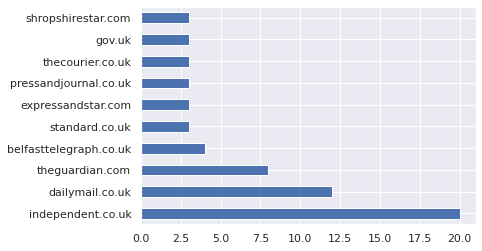

In [ ]:
df_news.clean_url.value_counts()[:10].plot.barh();

<div class="alert alert-info">

Now, reproduce the exercise 4.4 using NewsCatcher. What do you notice in terms of volume of collected articles?

</div>

In [ ]:
# Your code here (optional)

## Documenting your final dataset using a ‘datasheet’

In exercise 4.4, you built a dataset from online sources, parsed, filtered, processed using code you developed. Increasingly, journals and conferences ask researchers to document how they collected data.

Gebru et al. proposed in 2018 a new toolkit ([Datasheets for Datasets](https://arxiv.org/abs/1803.09010)) to improve the transparency when releasing datasets as well as the standardise how datasets are described. A ‘datasheet’ documents the motivation behind the dataset creation, the dataset composition, collection process, recommended uses, and many other characteristics. In the words of Gebru et al., the goal is to:

> facilitate better communication between dataset creators and dataset consumers, and encourage the […] community to prioritize transparency and accountability.

Throughout this course, we will aim to build on the practice of documenting our datasets. For each week, the homework  will comprise some form of dataset collection. You will also be required to answer 4-5 questions on the dataset you collect for that week.

You can find an example of a datasheet here: https://github.com/zykls/folktables/blob/main/datasheet.md for the Folktables Python package. You can think of a datasheet as a set of standardised questions & answers that describe the content and ethics of your dataset.

--------


<div class="alert alert-info">
For this week's homework, we will start with basic Motivation and Composition questions. Look back at the dataset you assembed for exercise 4.4 and answer the following questions.
</div>


>**For what purpose was the dataset created?** *Was there a specific task in mind? Was there a specific gap that needed to be filled?*
>
>...


>**Who created the dataset (e.g., which team) and on behalf of which entity?**
>
>...


>**What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)?** Are there multiple types of instances (e.g., movies, users, and ratings; people and interactions between them; nodes and edges)? Please provide a description.
>
>...


>**How many instances are there in total (of each type, if appropriate)?**
>
>...




>**Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? If the dataset is a sample, then what is the larger set? Is the sample representative of the larger set (e.g., geographic coverage)?** If so, please describe how this representativeness was validated/verified. If it is not representative of the larger set, please describe why not (e.g., to cover a more diverse range of instances, because instances were withheld or unavailable)
>
>...

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f746e373-dc41-4dbe-b3f9-5f3af42ff658' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>